In [2]:
import pandas as pd
import numpy as np
# importing the file to colab 
from google.colab import files
uploaded = files.upload()
# datasource from https://www.kaggle.com/malcolm95/countries-shutting-down-the-internet-in-2021

Saving STOP-data-2021-Jan-May-for-public.csv to STOP-data-2021-Jan-May-for-public.csv


In [3]:
import pandas as pd
# reading the csv file
data = pd.read_csv("STOP-data-2021-Jan-May-for-public.csv")
# get the overview of the dataset
data.head()

,When did this shutdown start?,What is the current status of the internet shutdown? Is it ongoing?,When did the shutdown finish?,Which country did the shutdown occur in?,What is the scope of the shutdown?,Which area(s) city(ies) or region(s) were affected by this shutdown?,What type of shutdown is this?,What services did this shutdown impact?,"Was this a full-network, or service-based, shutdown?",Who ordered the shutdown?,Who was the decision maker? Please provide any further information you have on who ordered the shutdown.,What was the actual cause of the shutdown?,"Please provide further details on the actual cause of the internet shutdown, if known.",What is your primary source for this shutdown?,"Please enter the reference links of the source if applicable. If there are more than one, divide them with a "";"" mark.",What was the official justification given for the shutdown?,Please give any further details on the official justification of the internet shutdown.,Has the Government acknowledged the shutdown?,Did the government or relevant authority give any legal justification or refer to a law?,"Did the government or relevant authority use a memo, court order or similar instrument? Please provide a brief summary.","Please include a link to the official statement relating to the shutdown, if available.","Please include a quote from the relevant authorities relating to the justification of the shutdown, if available.",Was Facebook specifically targeted?,Was Twitter specifically targeted?,Was WhatsApp specifically targeted?,Was Instagram specifically targeted?,Was Telegram specifically targeted?,Please list any other web-based services that were specifically targeted during the service-based shutdown.,Were SMS services specifically targeted during the shutdown?,Were calling services specifically targeted during the shutdown?,Which Telco was involved in the shutting down of the internet or services?,Did the Telco acknowledge the shutdown happened?,"Please provide a source (one URL) if the Telco has acknowledged the shutdown, if possible.","Please provide a quote from the Telco if they have acknowledged the shutdown, if possible.",Did this shutdown involve an election?,Did this shutdown involve physical violence?,Have any human rights abuses been reported that specifically relate to this shutdown?,"Which of the following groups, if any, were impacted by the internet shutdown?",Please provide any further details on the users targeted in the shutdown.,Did users affected by the shutdown receive advance warning?,Please provide a short one- or two-sentence summary of the shutdown and the event that triggered it. Please note: This may be displayed publicly by Access Now.,"Please provide a reference link to an article about the shutdown on Access Now's homepage, if applicable.",Please include any notes about this shutdown you feel are relevant for the KIO team. They will not be shared with external partners.
0,6/22/2019,Ended,2/3/2021,Myanmar,It affected more than one city in the same sta...,"Buthidaung, Rathedaung, Myabon, Paletwa, Ponna...",Throttle,Mobile,Full network,Executive government,Myanmar Ministry of Transport and Communicatio...,Political instability,NaN,News media article,https://www.accessnow.org/update-internet-acce...,Fake news/ Hate speech/ Incendiary content/ Pr...,"Acts of terrorism, act of disturbance, and ill...",Yes,Unknown,NaN,NaN,NaN,No,No,No,No,No,NaN,No,No,Myanmar: Telenor,Yes,https://www.telenor.com/network-restored-in-ei...,NaN,No,Yes,Unknown,Ethnic minorities,NaN,No,"Predominantly Rohingya, residents in Myanmar’s...",https://www.accessnow.org/elections-in-myanmar...,NaN
1,8/5/2019,Ended,2/5/2021,India,It affected more than one city in the same sta...,Jammu and Kashmir,Throttle,Mobile,Full network,Executive government,NaN,Political instability,NaN,News media article,https://indianexpress.com/article/india/jk-4g-...,National security/ Counter-terrorism,NaN,Yes,Yes,Yes. During 2021 the government issued Order

In [ ]:
# get the info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 43 columns):
 #   Column                                                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                                                           --------------  -----  
 0   When did this shutdown start?                                                                                                                                    50 non-null     object 
 1   What is the current status of the internet shutdown? Is it ongoing?                                                                                              50 non-null     object 
 2   When did the shutdown finish?                                                                                                       

In [ ]:
data.shape

(50, 43)

In [ ]:
# get the most frequent country shutting down internet
data['Which country did the shutdown occur in?'].value_counts()

India                         21
Myanmar                        5
Ethiopia                       2
Kazakhstan                     2
Uganda                         2
Chad                           2
Iran (Islamic Republic of)     2
Niger                          1
Bangladesh                     1
Palestine, State of            1
Syrian Arab Republic           1
Russian Federation             1
Belarus                        1
Senegal                        1
Pakistan                       1
China                          1
Gabon                          1
Congo                          1
Cuba                           1
Jordan                         1
Tajikistan                     1
Name: Which country did the shutdown occur in?, dtype: int64

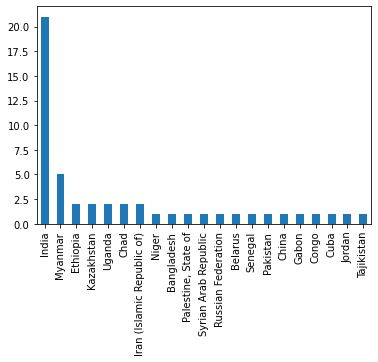

In [ ]:
import matplotlib.pyplot as plt
# visualize the most frequent country shutting down internet
df['Which country did the shutdown occur in?'].value_counts().plot.bar()
plt.show()
# from the output, India seems to be the country that shuts down the internet the most frequent

In [ ]:
# get the most frequent actual cause of lockdown
import pandas as pd
data["What was the actual cause of the shutdown?"].value_counts()

Political instability            20
Protests                         14
Elections                         4
Unknown                           4
Communal violence                 2
Religious holiday/anniversary     2
Other                             2
Information control               1
Exam cheating                     1
Name: What was the actual cause of the shutdown?, dtype: int64

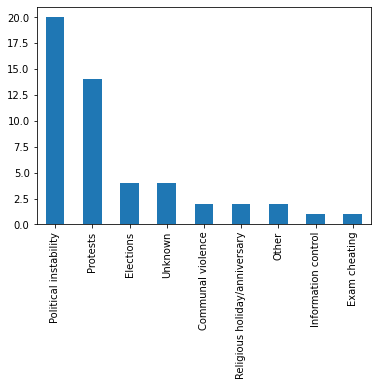

In [ ]:
import matplotlib.pyplot as plt
# visualize the most frequent cause of shutting down internet
df['What was the actual cause of the shutdown?'].value_counts().plot.bar()
plt.show()

In [ ]:
# Further analysis: get the most frequent country with the most frequent internet shutdown cause
import pandas as pd
df.groupby(['Which country did the shutdown occur in?','What was the actual cause of the shutdown?']).size().idxmax()

('India', 'Political instability')

In [ ]:
# Further analysis: get the most frequent country with the most frequent shutdown order giver
import pandas as pd
df.groupby(['Which country did the shutdown occur in?','Who ordered the shutdown?']).size().idxmax()

('India', 'Local government')

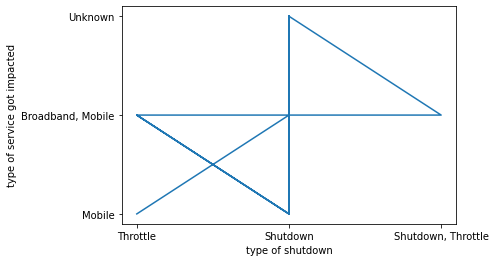

In [ ]:
# Comparing type of shutdown with services which got impacted 
import matplotlib.pyplot as plt
import pandas as pd
plt.plot(df['What type of shutdown is this?'],df['What services did this shutdown impact?'])
plt.xlabel("type of shutdown")
plt.ylabel("type of service got impacted")
plt.show()

In [ ]:
# get the 5 most frequent justification for the internet shutdown 
import matplotlib.pyplot as plt
n = 5
data['What was the official justification given for the shutdown?'].value_counts()[:n].index.tolist()

['Unknown',
 'National security/ Counter-terrorism',
 'Fake news/ Hate speech/ Incendiary content/ Promoting violence',
 'Precautionary measure',
 'Public safety/ Quell unrest / Restore public order']

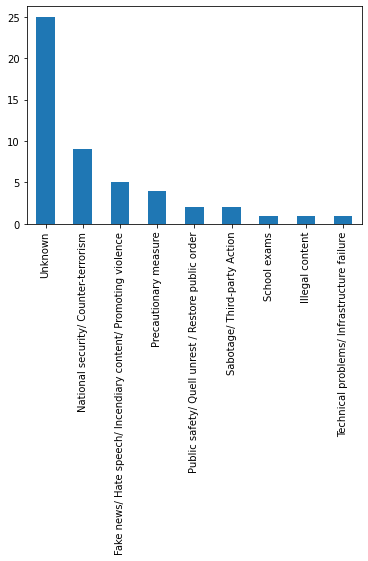

In [ ]:
# visualize the most frequent internet justification shutdown
import matplotlib.pyplot as plt
df['What was the official justification given for the shutdown?'].value_counts().plot.bar()
plt.show()

In [23]:
# get the most frequent internet shutdown duration, mean and median of the internet shutdown duration
import pandas as pd
# convert the columns to datetime using pandas
data['When did this shutdown start?'] = pd.to_datetime(data['When did this shutdown start?'])
data['When did the shutdown finish?'] = pd.to_datetime(data['When did the shutdown finish?'])
data["diff"] = data['When did the shutdown finish?'] - data['When did this shutdown start?']
mean = data['diff'].mean()
median = data['diff'].median()
print(data['diff'].value_counts())
print('the mean of the internet shutdown duration is' + ' ' + str(mean))
print('the median of the internet shutdown duration is' + ' ' + str(median))

0 days      12
1 days       9
2 days       3
5 days       2
4 days       2
6 days       1
11 days      1
3 days       1
9 days       1
550 days     1
70 days      1
592 days     1
13 days      1
Name: diff, dtype: int64
the mean of the internet shutdown duration is 35 days 18:00:00
the median of the internet shutdown duration is 1 days 00:00:00


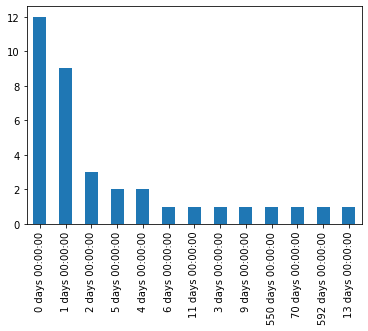

In [29]:
# visualize the data of internet shutdown duration
import pandas as pd
import matplotlib.pyplot as plt
data['diff'].value_counts().plot.bar()
plt.show()

Yes        22
No         15
Unknown    13
Name: Has the Government acknowledged the shutdown?, dtype: int64


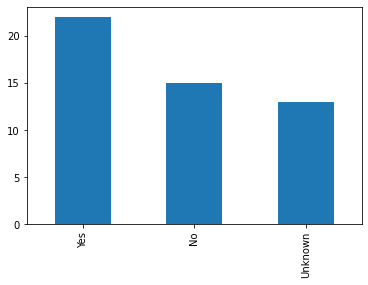

In [30]:
# Has the Government acknowledged the shutdown?
import matplotlib.pyplot as plt
import pandas as pd
print(data['Has the Government acknowledged the shutdown?'].value_counts())
data['Has the Government acknowledged the shutdown?'].value_counts().plot.bar()
plt.show()